# Unsupervised metrics for choosing number of NMF components

### Here we outline what went into choosing $k=16$ components for our model.

#### We show that the F1 score and AUPRC metrics point to $k=15-20$, and by some measures they point to $k=16$ specifically. 

Note: there are other accepted metrics in the literature for choosing an optimal number of $k$. One is cophenetic correlation, which measures concurence of major component between different random initalizations for a given $k$. We find that cophenetic correlation is not a sensitive enough metric within the range of $k$ we are considering, and there is no clear optimum. Moreover, we do not use random initialization for our model, which would make the results even less meaingful. 

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [2]:
NC_ar = [4,8,10,11,12,13,14,15,16,17,18,19,20,24,28,32,36]
NC_ar = np.array(NC_ar)

In [3]:
sys.path.append('..')
import OONMF 
import OONMFhelpers as OH

# First we try to find the optimal decision boundary for F1 score analysis

<Figure size 432x288 with 0 Axes>

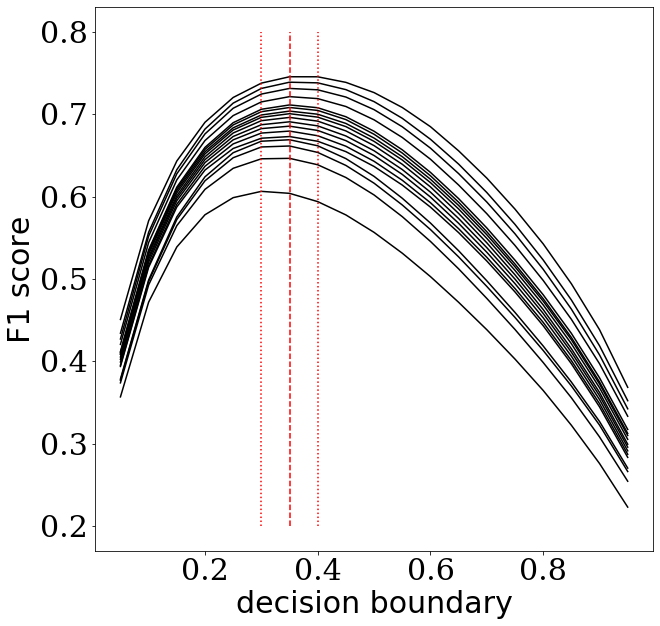

In [4]:
plt.clf()
plt.figure(figsize=(10,10))
prAUC_ar = []
for comp in NC_ar:
    finname = '../data/TotalPR/2018-06-08NC'+str(comp)+'_NNDSVD_TotalPR.txt'
    DF = pd.read_table(finname)
    prec = DF.TP.values / (DF.TP.values + DF.FP.values)
    recall = DF.TP.values / (DF.TP.values + DF.FN.values)
    F1 = 2*prec*recall / (prec+recall)
    prAUC_ar.append(np.trapz([1] + list(recall) + [0], [0] + list(prec) +[1]))
    plt.plot(DF.threshold.values, F1, '-k')

    
plt.plot([0.35, 0.35], [0.2, 0.8], '--r')
plt.plot([0.4, 0.4], [0.2, 0.8], ':r')
plt.plot([0.3, 0.3], [0.2, 0.8], ':r')
OH.increase_axis_fontsize()
plt.xlabel('decision boundary', fontsize=30)
plt.ylabel('F1 score', fontsize=30)
plt.show()
plt.close()


### pretty clear that 0.35 is an ideal decision boundary for most choices of k

### Now we look at AUPRC vs k, and the first derivative of AUPRC

<Figure size 432x288 with 0 Axes>

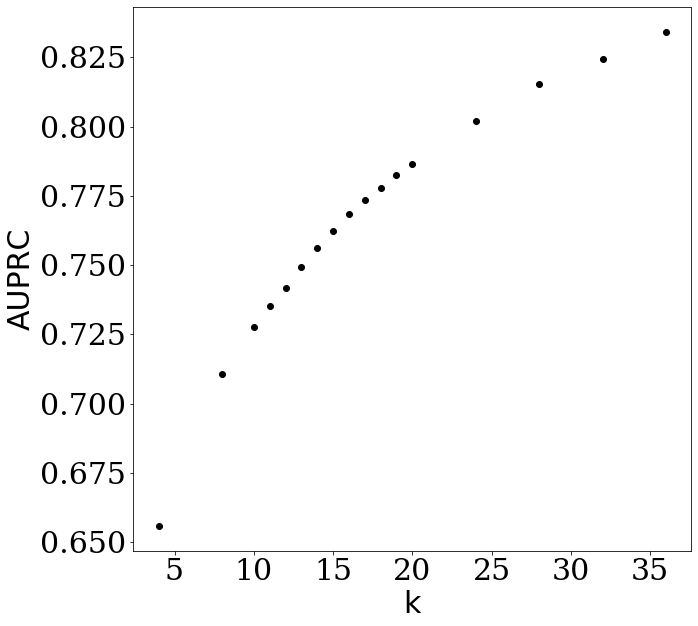

In [5]:
plt.clf()
plt.figure(figsize=(10,10))
plt.plot(NC_ar, prAUC_ar, 'ok')
OH.increase_axis_fontsize()
plt.xlabel('k', fontsize=30)
plt.ylabel('AUPRC', fontsize=30)
plt.show()
plt.close()

<Figure size 432x288 with 0 Axes>

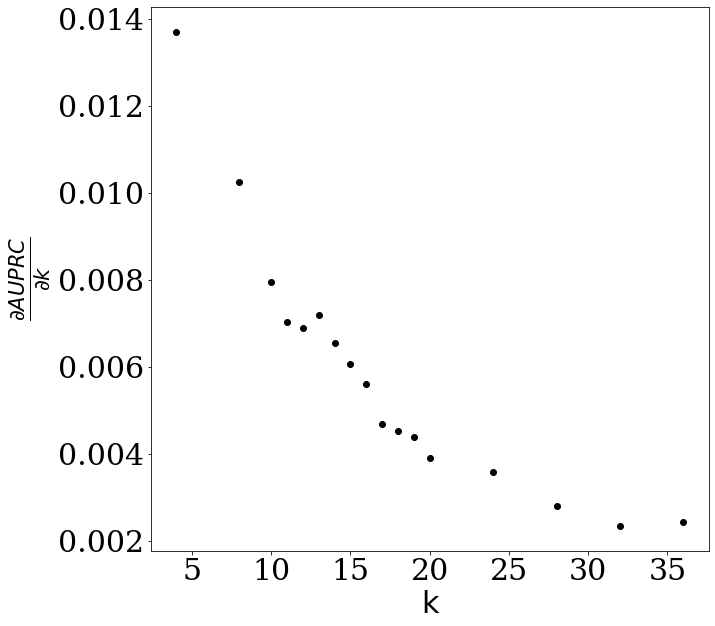

In [6]:
plt.clf()
plt.figure(figsize=(10,10))
plt.plot(NC_ar, np.gradient(prAUC_ar, NC_ar), 'ok')
OH.increase_axis_fontsize()
plt.xlabel('k', fontsize=30)
plt.ylabel(r'$\frac{\partial AUPRC}{\partial k}$', fontsize=30)
plt.show()
plt.close()

### We observe a large drop in the derivative (i.e. gain) of AUPRC at k=16. Let's do the same for the F1 score.

In [7]:
F1_ar733 = []
for comp in NC_ar:
    finname = '../data/TotalPR/2018-06-08NC'+str(comp)+'_NNDSVD_TotalPR.txt'
    DF = pd.read_table(finname)
    prec = DF.TP.values / (DF.TP.values + DF.FP.values)
    recall = DF.TP.values / (DF.TP.values + DF.FN.values)
    F1 = 2*prec*recall / (prec+recall)
    #plt.plot(DF.threshold.values, F1, '--b')
    F1_ar733.append(F1[6])
    
    
F1_ar733 = np.array(F1_ar733)

<Figure size 432x288 with 0 Axes>

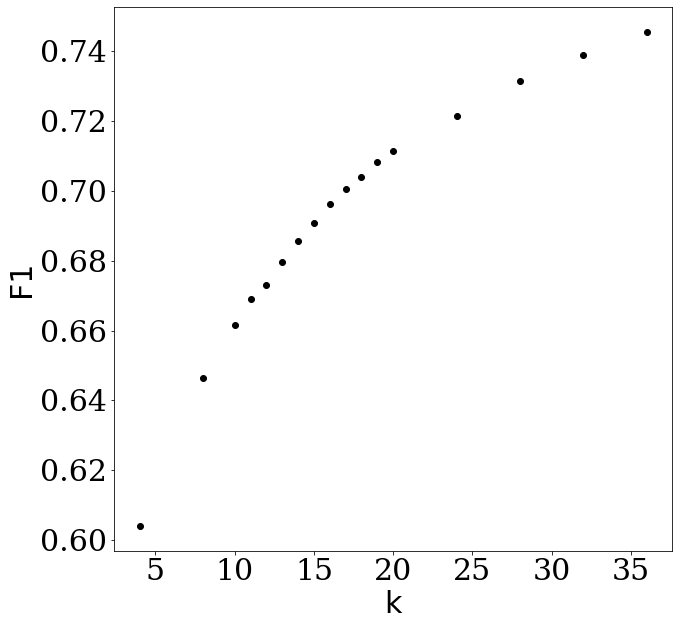

In [8]:
plt.clf()
plt.figure(figsize=(10,10))
plt.plot(NC_ar, F1_ar733, 'ok')
OH.increase_axis_fontsize()
plt.xlabel('k', fontsize=30)
plt.ylabel('F1', fontsize=30)
plt.show()
plt.close()

<Figure size 432x288 with 0 Axes>

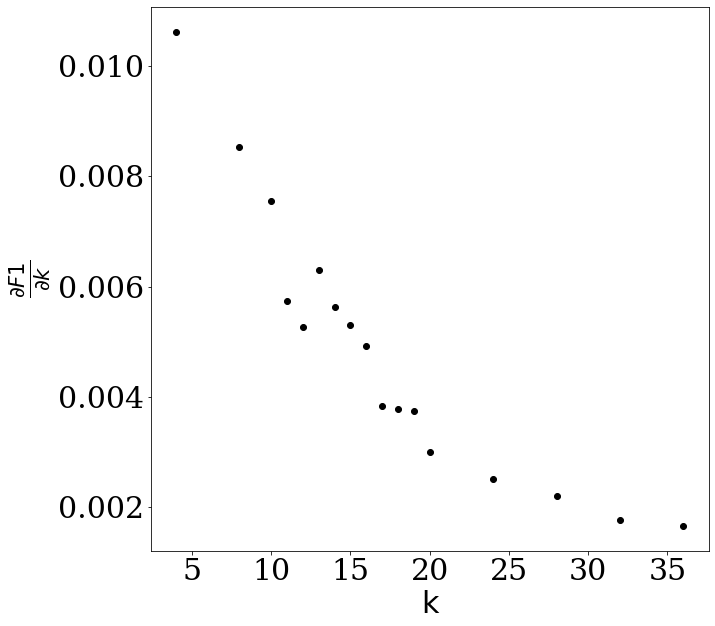

In [9]:
plt.clf()
plt.figure(figsize=(10,10))
plt.plot(NC_ar, np.gradient(F1_ar733, NC_ar), 'ok')
OH.increase_axis_fontsize()
plt.xlabel('k', fontsize=30)
plt.ylabel(r'$\frac{\partial F1}{\partial k}$', fontsize=30)
plt.show()
plt.close()

### The same holds for the F1 score, suggesting that k=16 is a good choice.